In [1]:
import gudhi as gd
import pandas as pd

passwords_data_frame = pd.read_csv('data/DSL-StrongPasswordData.csv',
                                 dtype = {'subject' : 'string'},
                                 index_col = ['subject', 'sessionIndex', 'rep'])

In [7]:
people = [passwords_data_frame.loc[(f's{n:03}', 3)] for n in range(2,6)]

50
3595
57
50
5913
58
50
353
51
50
8396
61


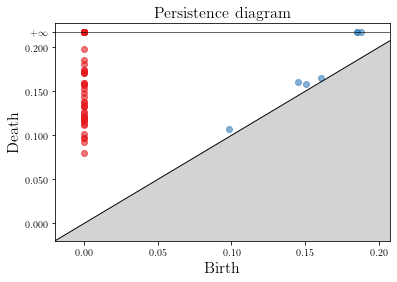

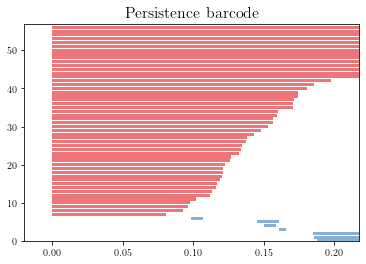

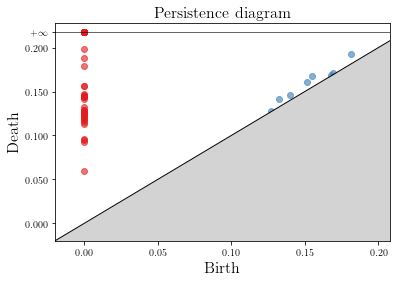

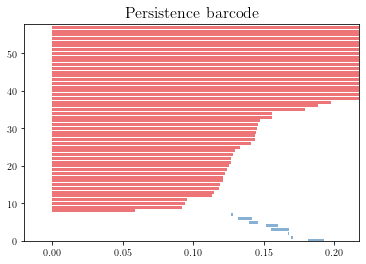

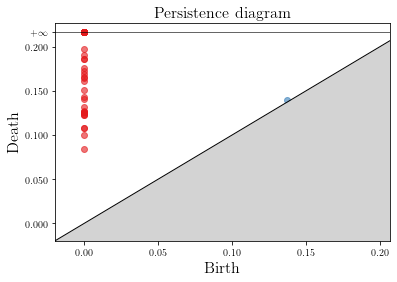

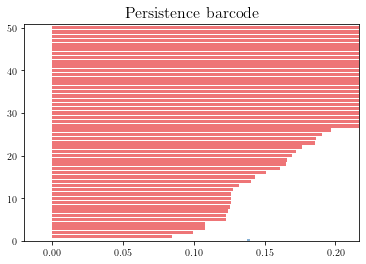

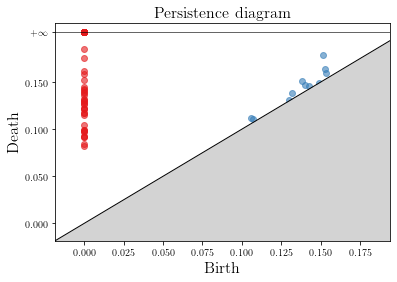

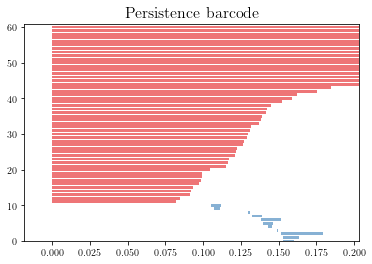

In [8]:
persistence = []

for person in people:
    skeleton = gd.RipsComplex(points = person.values.tolist(),
                              max_edge_length = 0.2)
    simplex_tree = skeleton.create_simplex_tree(max_dimension = 4)
    persistence.append(simplex_tree.persistence())
    gd.plot_persistence_diagram(simplex_tree.persistence())
    gd.plot_persistence_barcode(simplex_tree.persistence())
    print(simplex_tree.num_vertices())
    print(simplex_tree.num_simplices())
    print(len(simplex_tree.persistence()))

In [ ]:
#THIS CODE NO LONGER WORKS PAST THIS POINT. See the first file that was posted to discord 
# for working code that flows through the whole notebook.
#
# BarCodes_0 = simplextree_0.persistence()
# BarCodes_1 = simplextree_1.persistence()
# print(len(BarCodes_0))
# print(len(BarCodes_1))
#

In [ ]:
# for i in range(20):
#     print(BarCodes_Rips0)
#

In [ ]:
# gd.plot_persistence_diagram(BarCodes_0);
# gd.plot_persistence_diagram(BarCodes_1);
#

In [ ]:
# for i in range(0,3):
#
#     I0 = simplextree_0.persistence_intervals_in_dimension(i)
#     I1 = simplextree_1.persistence_intervals_in_dimension(i)
#
#     print(len(I0))
#     print(len(I1))
#     print(gd.bottleneck_distance(I0,I1))
#

In [ ]:
# for i in range(57):
#     for j in range(i):
#         distance[i,j] = gd.bottleneck_distance(zerobarcodes[i], zerobarcodes[j])
#         distance[i,j] = gd.bottleneck_distance(zerobarcodes[i], zerobarcodes[j])
# distance=distance + distance.transpose()
# print(distance)
#